<a href="https://colab.research.google.com/github/fjadidi2001/AD_Prediction/blob/main/Simple_method_Jan12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

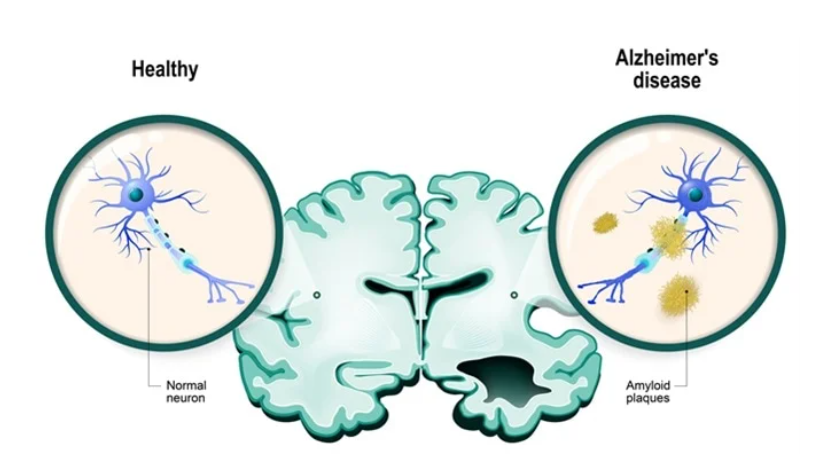

> Alzheimer's disease is the most common type of dementia. It is a progressive disease beginning with mild memory loss and possibly leading to loss of the ability to carry on a conversation and respond to the environment. Alzheimer's disease involves parts of the brain that control thought, memory, and language.



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import seaborn as sns
import pathlib
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("katalniraj/adni-extracted-axial")

print("Path to dataset files:", path)

100%|██████████| 102M/102M [00:06<00:00, 16.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/katalniraj/adni-extracted-axial/versions/1


> The kagglehub library is used to interact with Kaggle's datasets, models, and other resources. It provides functions to download datasets directly from Kaggle.

> The dataset_download function is used to download a dataset from Kaggle. The argument "katalniraj/adni-extracted-axial" specifies the dataset to download. This is the dataset's identifier on Kaggle, where katalniraj is the user who uploaded the dataset, and adni-extracted-axial is the name of the dataset.

> The function returns the path where the dataset is downloaded. This path is stored in the variable path.

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/root/.cache/kagglehub/datasets/katalniraj/adni-extracted-axial/versions/1",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=[180, 180],
    batch_size=16,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/root/.cache/kagglehub/datasets/katalniraj/adni-extracted-axial/versions/1",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=[180, 180],
    batch_size=16 ,
)

Found 5154 files belonging to 1 classes.
Using 4124 files for training.
Found 5154 files belonging to 1 classes.
Using 1030 files for validation.
